<a href="https://colab.research.google.com/github/pmantramurti/CMPE257-Fall23-Pranay-Mantramurti/blob/take-home-exam/Take_Home_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

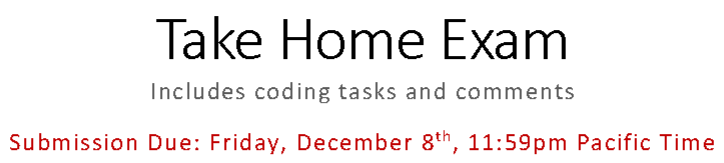

In [98]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#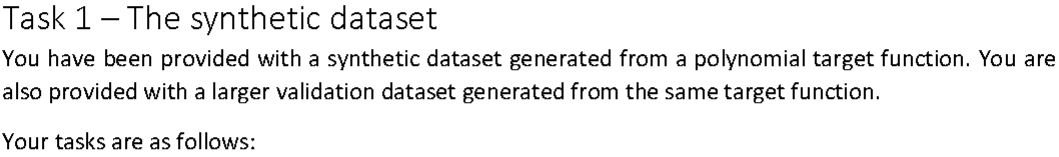

In [100]:
df_synth_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ExamData/synthetic_dataset.csv', delimiter=',')
df_synth_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ExamData/synthetic_test_dataset.csv', delimiter=',')
df_synth_train['bias'] = 1
df_synth_test['bias'] = 1
df_synth_train.shape

(50, 4)

##image.png

In [182]:
def getSign(x):
  if x < 0:
    return -1
  if x >= 0:
    return 1

def testModel(w, test_in, test_out):
  err = 0
  size = len(test_in)
  corr = size
  for i in range(size):
    test_res = getSign(np.dot(w, test_in.iloc[i]))
    if test_res != test_out.iloc[i]:
      corr -= 1
      err += (test_res - test_out.iloc[i])**2
  err = err/size
  acc = corr/size
  return err, acc

In [254]:
def getDot(w, i, df):
  ans = np.dot(w, df.iloc[i])
  return ans

def adjustWeights(w, i, input, output, n):
  w2 = np.array(w) + np.array(input.iloc[i])*output.iloc[i]*n
  return w2

def Pocket(input, output, n, iter):
  w = [0] * input.shape[1]
  wFin = w.copy()
  error = 0
  minError = np.inf
  accurate = False
  updates = 0
  while not accurate and updates < iter :
    #if updates%(iter/5) == 0:
      #print('Updates :', updates, ', Error :', minError)
    updates += 1
    accurate = True
    i = random.randrange(0, input.shape[0])
    s = getDot(w, i, input)
    if s != output.iloc[i]:
      w = adjustWeights(w, i, input, output, n)

    out = np.dot(w, np.transpose(input))
    error = np.sum((np.array(out)-np.array(output))**2)
    if error != 0:
      accurate = False
    if error < minError:
      minError = error
      wFin = w.copy()
    error = 0
  return wFin, minError

In [102]:
def LinReg(x, y):
  w = np.dot(x, np.transpose(x))
  w = np.dot(np.linalg.inv(w), x)
  w = np.dot(np.transpose(w), y)
  return w

In [103]:
def genTransform(df):
  df['x1^2'] = np.array(df['x1'])**2                        #x1^2
  df['x1x2'] = np.array(df['x1'])*df['x2']                  #x1 * x2
  df['x2^2'] = np.array(df['x2'])**2                        #x2^2

  df['x1x2^2'] = np.array(df['x1'])*np.array(df['x2^2'])    #x1 * x2^2
  df['x1^2x2'] = np.array(df['x2'])*np.array(df['x1^2'])    #x2 * x1^2
  df['x1^3'] = np.array(df['x1']) ** 3                      #x1^3
  df['x2^3'] = np.array(df['x2']) ** 3                      #x2^3

  df['x1^4'] = np.array(df['x1']) ** 4                      #x1^4
  df['x2^4'] = np.array(df['x2']) ** 4                      #x2^4
  df['x1^2x2^2'] = np.array(df['x1^2'])*np.array(df['x2^2'])#x1^2 * x2^2
  df['x1x2^3'] = np.array(df['x1'])*np.array(df['x2^3'])    #x1 * x2^3
  df['x1^3x2'] = np.array(df['x2'])*np.array(df['x1^3'])    #x2 * x1^3
  return df

df_synth_train = genTransform(df_synth_train)
df_synth_test = genTransform(df_synth_test)

In [247]:
train_input = df_synth_train[['bias', 'x1', 'x2']]
train_output = df_synth_train['y']

w = LinReg(train_input, train_output)

test_input = df_synth_test[['bias', 'x1', 'x2']]
test_output = df_synth_test['y']

Step1_trainErr, Step1_trainAcc = testModel(w, train_input, train_output)
Step1_testErr, Step1_testAcc = testModel(w, test_input, test_output)

print('Train Error :', Step1_trainErr)
print('Test Error :', Step1_testErr)
print('Test Accuracy :', Step1_testAcc)

Train Error : 1.2
Test Error : 1.36
Test Accuracy : 0.66


In [255]:
train_input = df_synth_train[['bias', 'x1', 'x2']]
train_output = df_synth_train['y']

n = 1e-3
iter = 1e4
w, Pock_trainErr = Pocket(train_input, train_output, n, iter)

test_input = df_synth_test[['bias', 'x1', 'x2']]
test_output = df_synth_test['y']

Pock_testErr, Pock_testAcc = testModel(w, test_input, test_output)

print('Train Error :', Pock_trainErr)
print('Test Error :', Pock_testErr)
print('Test Accuracy :', Pock_testAcc)

Train Error : 43.4554115365862
Test Error : 1.456
Test Accuracy : 0.636


##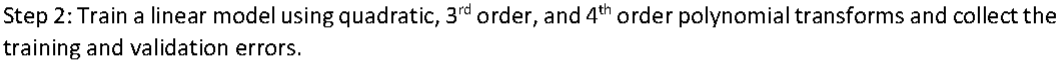

### Quadratic Transform

In [185]:
train_input = df_synth_train[['bias', 'x1', 'x2',
                              'x1^2', 'x2^2', 'x1x2']]
train_output = df_synth_train['y']

w = LinReg(train_input, train_output)

test_input = df_synth_test[['bias', 'x1', 'x2',
                            'x1^2', 'x2^2', 'x1x2']]
test_output = df_synth_test['y']

Step2_Quad_trainErr, Step2_Quad_trainAcc = testModel(w, train_input, train_output)
Step2_Quad_testErr, Step2_Quad_testAcc = testModel(w, test_input, test_output)

print('Train Error :', Step2_Quad_trainErr)
print('Test Error :', Step2_Quad_testErr)
#print('Test Accuracy :', Step2_Quad_testAcc)

Train Error : 2.0
Test Error : 2.112


### 3rd Order Transform

In [163]:
train_input = df_synth_train[['bias', 'x1', 'x2',
                              'x1^2', 'x2^2', 'x1x2',
                              'x1^3', 'x2^3', 'x1^2x2', 'x1x2^2']]
train_output = df_synth_train['y']

w = LinReg(train_input, train_output)

test_input = df_synth_test[['bias', 'x1', 'x2',
                            'x1^2', 'x2^2', 'x1x2',
                            'x1^3', 'x2^3', 'x1^2x2', 'x1x2^2']]
test_output = df_synth_test['y']

Step2_3rd_trainErr, Step2_3rd_trainAcc = testModel(w, train_input, train_output)
Step2_3rd_testErr, Step2_3rd_testAcc = testModel(w, test_input, test_output)

print('Train Error :', Step2_3rd_trainErr)
print('Test Error :', Step2_3rd_testErr)
#print('Test Accuracy :', Step2_3rd_testAcc)

Train Error : 1.6
Test Error : 1.576


### 4th Order Transform

In [164]:
train_input = df_synth_train[['bias', 'x1', 'x2',
                              'x1^2', 'x2^2', 'x1x2',
                              'x1^3', 'x2^3', 'x1^2x2', 'x1x2^2',
                              'x1^4', 'x2^4', 'x1^2x2^2', 'x1^3x2', 'x1x2^3']]
train_output = df_synth_train['y']

w = LinReg(train_input, train_output)

test_input = df_synth_test[['bias', 'x1', 'x2',
                            'x1^2', 'x2^2', 'x1x2',
                            'x1^3', 'x2^3', 'x1^2x2', 'x1x2^2',
                            'x1^4', 'x2^4', 'x1^2x2^2', 'x1^3x2', 'x1x2^3']]
test_output = df_synth_test['y']

Step2_4th_trainErr, Step2_4th_trainAcc = testModel(w, train_input, train_output)
Step2_4th_testErr, Step2_4th_testAcc = testModel(w, test_input, test_output)

print('Train Error :', Step2_4th_trainErr)
print('Test Error :', Step2_4th_testErr)
#print('Test Accuracy :', Step2_4th_testAcc)

Train Error : 2.08
Test Error : 2.032


##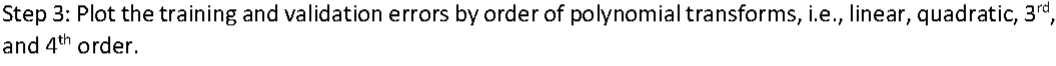

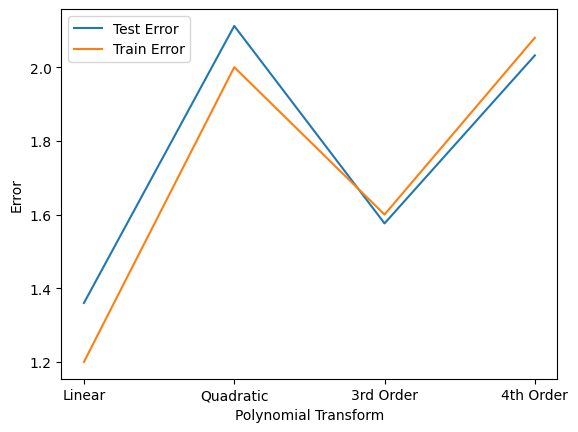

In [165]:
Error_train = [Step1_trainErr, Step2_Quad_trainErr, Step2_3rd_trainErr, Step2_4th_trainErr]
Error_test = [Step1_testErr, Step2_Quad_testErr, Step2_3rd_testErr, Step2_4th_testErr]
#Accuracy_test = [Step1_testAcc, Step2_Quad_testAcc, Step2_3rd_testAcc, Step2_4th_testAcc]

plt.plot(Error_test, label='Test Error')
plt.plot(Error_train, label='Train Error')
#plt.plot(Accuracy_test, label='Test Accuracy')

x_labels = ['Linear', 'Quadratic', '3rd Order', '4th Order']
x_values = [0, 1, 2, 3]
plt.xticks(x_values, x_labels)
plt.ylabel('Error')
plt.xlabel('Polynomial Transform')
plt.legend()
plt.show()

##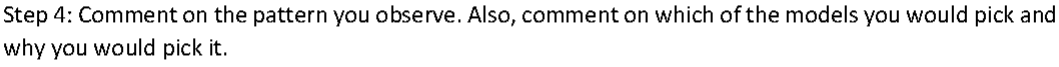

For this task, after trying both Pocket and Linear Regression on step 1, I decided to go with the Linear Regression Algorithm, as it performed better and faster on the dataset.

The pattern thus far is that odd ordered transforms perform better in terms of error than than the even ordered transforms, and each odd transform performs worse than the preceding odd transform, and vice versa. In this case, the linear and 3rd order transforms perform noticeably better than the quadratic and 4th order transform, and, the linear transform performs better than the 3rd, while the quadratic performs about as well as the 4th order.

Based on what I've learned thus far, I would posit that this behaviour is because the higher order transforms start to overfit the dataset as they increase in level. On top of that, I believe the reason that the odd transforms perform better overall than the even ones is because the original target function is probably also an odd function.

As for which model I would select, since the Linear transform has the lowest error both in training and in testing, and the Linear Regression algorithm performed better than the Pocket did, I would select the **Linear transform model on the Linear Regression Algorithm**.

#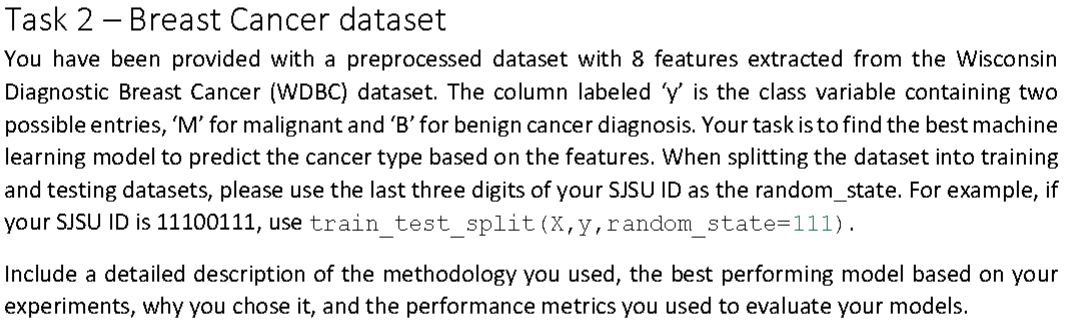

In [136]:
from sklearn.model_selection import train_test_split
import math

In [138]:
def normalizeDF(df):
  for col in df.columns:
    max = np.max(df[col])
    min = np.min(df[col])
    df[col] = (df[col] - min)/(max - min)
  return df

In [173]:
random.seed(117)
df_cancer = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ExamData/breast_cancer_dataset_preprocessed.csv', delimiter=',')

X = normalizeDF(df_cancer[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']])
df_cancer['y'] = df_cancer['y'].replace('M', 1)
df_cancer['y'] = df_cancer['y'].replace('B', -1)
Y = df_cancer[['y']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 117)

<ipython-input-138-817af9e7f0de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col] - min)/(max - min)


## Model 1 - Linear Regression

In [187]:
train_input = x_train.copy()
train_input.insert(loc = 0, column = 'bias', value = 1)
train_output = y_train['y']

w = LinReg(train_input, train_output)

test_input = x_test.copy()
test_input.insert(loc = 0, column = 'bias', value = 1)
test_output = y_test['y']

lin_trainErr, lin_trainAcc = testModel(w, train_input, train_output)
lin_testErr, lin_testAcc = testModel(w, test_input, test_output)

print('Train Error :', lin_trainErr)
print('Test Error :', lin_testErr)
print('Test Accuracy :', lin_testAcc)

Train Error : 2.526315789473684
Test Error : 2.4583333333333335
Test Accuracy : 0.3854166666666667


## Model 2 - Pocket Algorithm

In [256]:
train_input = x_train.copy()
train_input.insert(loc = 0, column = 'bias', value = 1)
train_output = y_train['y']

test_input = x_test.copy()
test_input.insert(loc = 0, column = 'bias', value = 1)
test_output = y_test['y']

Ns = [1e-4,1e-3,1e-2,1e-1,1]
iters = [1e3, 5e3, 1e4, 5e4, 1e5, 5e5]

for n in Ns:
  print('n =', n)
  for iter in iters:
    print('  Number of Iterations =', iter)
    n = 1e-3
    iter = 1e4
    w, Pock_trainErr = Pocket(train_input, train_output, n, iter)

    Pock_testErr, Pock_testAcc = testModel(w, test_input, test_output)

    print('    Train Error :', Pock_trainErr)
    print('    Test Error :', Pock_testErr)
    print('    Test Accuracy :', Pock_testAcc)

n = 0.0001
  Number of Iterations = 1000.0
    Train Error : 260.5516731975409
    Test Error : 1.5416666666666667
    Test Accuracy : 0.6145833333333334
  Number of Iterations = 5000.0
    Train Error : 263.6878910342945
    Test Error : 1.5416666666666667
    Test Accuracy : 0.6145833333333334
  Number of Iterations = 10000.0
    Train Error : 260.87652277024415
    Test Error : 1.5416666666666667
    Test Accuracy : 0.6145833333333334
  Number of Iterations = 50000.0
    Train Error : 262.54800137475513
    Test Error : 1.5416666666666667
    Test Accuracy : 0.6145833333333334
  Number of Iterations = 100000.0
    Train Error : 261.5757668637211
    Test Error : 1.5416666666666667
    Test Accuracy : 0.6145833333333334
  Number of Iterations = 500000.0
    Train Error : 260.69192842708753
    Test Error : 1.5416666666666667
    Test Accuracy : 0.6145833333333334
n = 0.001
  Number of Iterations = 1000.0
    Train Error : 261.11818086162464
    Test Error : 1.5416666666666667
    Tes

## Model 3 - Neural Network

In [267]:
#Neural Network
class Layer:
  def __init__(self, weights = None, values = None, gradients = None):
    if gradients is not None:
      self.gradients = gradients
    else:
      self.weights = weights
      self.values = values
      self.delta = np.zeros_like(self.values)

def init_Network(d, hidden_layers):#d = [Input units, hidden units, output units], ex : [2, m, 1]
  network = []
  network.append(Layer(np.random.rand(d[1], d[0] + 1), np.zeros(d[1])))
  for i in range(hidden_layers - 1):
    network.append(Layer(np.random.rand(d[1], d[1] + 1), np.zeros(d[1])))
  network.append(Layer(np.random.rand(d[2], d[1] + 1), np.zeros(d[2])))
  return network

def neuron_activation(input, weight):
  temp_w = np.delete(weight.copy(), -1, axis=1)
  bias = np.array(weight[:, -1])
  out = np.dot(temp_w, input)
  out += np.transpose(bias)
  out = np.tanh(out)
  return out

def forward_propagation(network, input, expected_output, sample_size):
  result = [network.copy() for i in range(sample_size)]
  for sample in range(sample_size):
    result[sample][0].values = neuron_activation(np.array(input[sample]), np.array(result[sample][0].weights))
    for layer in range(1, len(result[0])):
      result[sample][layer].values = neuron_activation(np.array(result[sample][layer-1].values), np.array(result[sample][layer].weights))
  Error = 0
  for i in range(sample_size):
    Error += (result[i][-1].values[0] - expected_output[i])**2/sample_size
  return result, Error

def tanh_derivative(input):
  output = 1 - np.array(input)**2
  return output

def back_propagation(result, expected_output, sample_size):
  for sample in range(sample_size):
    exp_out = expected_output[sample]
    result[sample][-1].delta = [2*(result[sample][-1].values - expected_output[sample]) * tanh_derivative(result[sample][-1].values)]
    for layer in reversed(range(len(result[sample])-1)):
      prev_delta = np.array(result[sample][layer+1].delta)
      prev_weight = np.delete(np.array(result[sample][layer+1].weights).copy(), -1, axis=1)
      deriv_value = np.array(tanh_derivative(result[sample][layer].values))
      result[sample][layer].delta = np.array(prev_delta) * np.array(prev_weight) * np.array(deriv_value)
  return result

def update_weights(result, inputs, sample_size, learning_rate):
  fin_network = result[0].copy()
  for sample in range(sample_size):
    for layer in range(len(result[sample])):
      vals = []
      if layer == 0:
        vals = [np.append(inputs[sample].copy(), 1)]
      else:
        vals = [np.append(result[sample][layer - 1].values, 1)]
      fin_network[layer].weights -= learning_rate * np.transpose(result[sample][layer].delta) * np.array(vals) / sample_size
  return fin_network

def for_back_prop_grad_desc(d, num_hidden_layers, x_train, y_train, sample_size, iterations):
  network = init_Network(d, num_hidden_layers)
  finNet = network.copy()
  counter = 0
  minErr = np.inf
  Error = []
  time_stamps = []
  threshold_base = iterations/10
  df = pd.concat([x_train, y_train], axis=1)
  while counter < iterations:
    sample_df = df.sample(n=sample_size)
    x_sample = sample_df.iloc[:, :len(x_train.columns)]
    y_sample = sample_df.iloc[:, len(x_train.columns):]
    input = x_sample.to_numpy()
    exp_out = y_sample.to_numpy()
    out, err = forward_propagation(np.array(network), input, exp_out, sample_size)
    if err < minErr:
      minErr = err
      finNet = network.copy()
    result = back_propagation(np.array(out), exp_out, sample_size)
    network = update_weights(result, input, sample_size, learning_rate = 0.01)
    #if counter % threshold_base == 0:
      #print(counter, ' iterations, Error = ', err)
    Error.append(err)
    time_stamps.append(counter)
    counter += sample_size
  return finNet, minErr

def test_sample(network, test_in, test_out):
  Error = 0
  size = len(test_in)
  counter = 0
  for sample in range(size):
    network[0].values = neuron_activation(np.array(test_in.iloc[sample]), np.array(network[0].weights))
    for layer in range(1, len(network)):
      network[layer].values = neuron_activation(np.array(network[layer-1].values), np.array(network[layer].weights))
    Error += (getSign(network[-1].values[0]) - test_out.iloc[sample])**2/size
    if getSign(network[-1].values[0]) != test_out.iloc[sample][0]:
      counter += 1
  return Error, (1 - counter/size)

In [280]:
hidden_layers = 1
sample_size = 1
iterations = [1e3, 1e4, 1e5]
Ms = [3, 4, 5, 6]
Train_err = np.zeros((4, 3))
Test_err = np.zeros((4, 3))
Test_acc = np.zeros((4, 3))
m_c = 0
i_c = 0
for m in Ms:
  for it in iterations:
    d = [8, m, 1]
    network1, error1 = for_back_prop_grad_desc(d, hidden_layers, x_train, y_train, sample_size, it)

    NN1_err, accuracy1 = test_sample(network1, x_test, y_test)
    Train_err[m_c][i_c] =  error1[0]
    Test_err[m_c][i_c] = NN1_err[0]
    Test_acc[m_c][i_c] = accuracy1
    i_c +=1
  i_c = 0
  m_c += 1

In [281]:
minStat = np.unravel_index(Train_err.argmin(), Train_err.shape)
print('Best Model by Training Error has m =', Ms[minStat[0]], ',', iterations[minStat[1]], 'iterations.')
print('  Training Error =', Train_err[minStat[0]][minStat[1]])
print('  Testing Error  =', Test_err[minStat[0]][minStat[1]])
print('  Test Accuracy  =', Test_acc[minStat[0]][minStat[1]])
minStat = np.unravel_index(Test_err.argmin(), Test_err.shape)
print('Best Model by Test Error has m =', Ms[minStat[0]], 'and', iterations[minStat[1]], 'iterations.')
print('  Training Error =', Train_err[minStat[0]][minStat[1]])
print('  Testing Error  =', Test_err[minStat[0]][minStat[1]])
print('  Test Accuracy  =', Test_acc[minStat[0]][minStat[1]])
minStat = np.unravel_index(Test_acc.argmax(), Test_acc.shape)
print('Best Model by Test Accuracy has m =', Ms[minStat[0]], 'and', iterations[minStat[1]], 'iterations.')
print('  Training Error =', Train_err[minStat[0]][minStat[1]])
print('  Testing Error  =', Test_err[minStat[0]][minStat[1]])
print('  Test Accuracy  =', Test_acc[minStat[0]][minStat[1]])

Best Model by Training Error has m = 6 , 100000.0 iterations.
  Training Error = 2.3732277343128318e-12
  Testing Error  = 0.3333333333333333
  Test Accuracy  = 0.9166666666666666
Best Model by Test Error has m = 6 and 10000.0 iterations.
  Training Error = 1.0709655273792856e-08
  Testing Error  = 0.08333333333333333
  Test Accuracy  = 0.9791666666666666
Best Model by Test Accuracy has m = 6 and 10000.0 iterations.
  Training Error = 1.0709655273792856e-08
  Testing Error  = 0.08333333333333333
  Test Accuracy  = 0.9791666666666666


## Model 4 - SVC

In [278]:
from sklearn import svm
from sklearn.metrics import accuracy_score

kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
  svc = svm.SVC(kernel=kernel, C=1)
  svc.fit(x_train, y_train.values.ravel())
  svc_test_predictions = svc.predict(x_test)
  svc_test_acc = accuracy_score(y_test.values.ravel(), svc_test_predictions)
  print(kernel, 'kernel Accuracy = ', svc_test_acc)

linear kernel Accuracy =  0.9583333333333334
poly kernel Accuracy =  0.9270833333333334
rbf kernel Accuracy =  0.9479166666666666


## Conclusion

Tallying up the results, we can see the following Accuracies:

Model 1 [Linear Regression Algorithm] - 38.54%

Model 2 [Pocket] - 61.46% (all combinations of parameters produced the same performance)

Model 3 [Neural Network + 6 hidden nodes + 1e4 iter] - 97.91%

Model 4 [SVC with linear kernel] - 95.83%

My methodology for this task was to test each algorithm we have previously covered on the dataset, only skipping the PLA since it and Pocket are near identical. For each, I then tested each on every parameter I thought would have an effect on the outcome.

The Linear Regression Algorithm has no such parameters, it only takes the input and expected output as parameters. For Pocket, the pertinent parameters were learning rate and number of iterations, for the Neural Network it was number of nodes in each hidden layer and number of iterations, and for the SVC it was the kernel. For the NN I considered having number of hidden layers as a parameter as well, but after doing some research I found that for most machine learning tasks, 1 hidden layer is sufficient. Finally, for the SVC Model, I tested on the three different kernels.

Overall, in order to compare the models, I decided to compare their accuracies, since I knew that each of their accuracies was calculated the same way, while their respective error measures could be different. Using this as my measure, I selected the **Neural Network with 6 nodes per hidden layer and 1e4 iterations**.